In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.0f}'.format
plt.style.use('fivethirtyeight')

In [121]:
df_2021_excel = pd.read_excel('iPhone_2021_all_edit.xlsx')
df_2021_excel = df_2021_excel[['Product','Price','Date','Model']]
df_2021_plot = df_2021_excel[df_2021_excel['Price']>100]
df_2021_plot.sort_values(by=['Price'],ascending=False)
df_2021_plot['Date'] = pd.to_datetime(df_2021_plot['Date'])
df_2021_plot.head()

<ipython-input-121-b20f4e6857b5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_plot['Date'] = pd.to_datetime(df_2021_plot['Date'])


,Product,Price,Date,Model
181,Apple iPhone 6 16GB 64GB 128GB Factory Unlocked AT&T Verizon TMobile Sprint Mint,100,2021-04-08,6
182,Apple iPhone 8 Plus - 64GB - Space Gray (Straight Talk) A1864 (CDMA + GSM),101,2021-01-02,8+
183,Apple iPhone 7 A1778 32GB 128GB 256GB AT&T Verizon T-Mobile or Unlocked (P),101,2021-04-08,7
184,Apple iPhone 7 32GB Black (Unlocked) Smartphone,101,2021-04-08,XR
185,Apple iPhone 6 - 64GB - Space Gray (Unlocked) A1649 (CDMA + GSM) (CA),102,2021-01-08,6


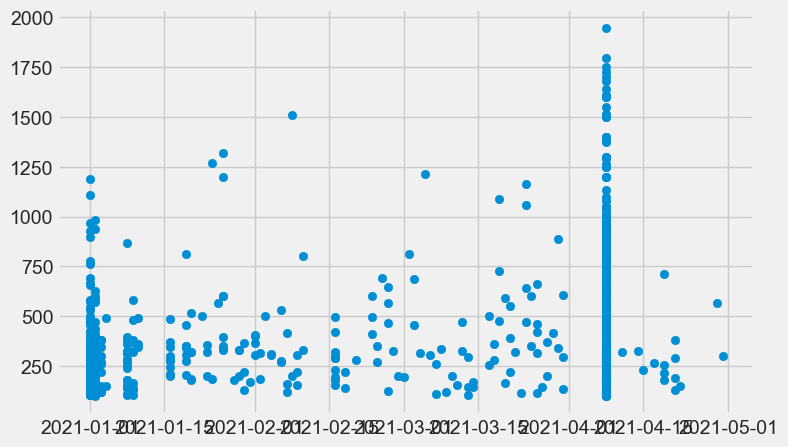

In [122]:
x = df_2021_plot['Date']
y = df_2021_plot['Price']
category = df_2021_plot['Model']

fig, ax = plt.subplots(figsize=(8,5))

ax.scatter(x, y)
plt.show()

In [123]:
df_2021_excel['Model'].value_counts().to_frame().head(8)

,Model
12,165
7,162
8,139
X,136
11,132
XR,126
XS,120
SE,92


In [124]:
df_2021_excel['Price'] = pd.to_numeric(df_2021_excel['Price'])
df_2021_excel.groupby('Model')['Price'].mean().to_frame().head()

,Price
Model,
4,17
5,76
6,158
7,173
8,226


In [125]:
df_2022_excel = pd.read_excel('iPhone_2022_all_edit.xlsx')
#df_2022_excel = df_2022_excel[['Product','Price','Date','Model']]
df_2022_plot = df_2022_excel[df_2022_excel['Price']>100]
df_2022_plot['Date'] = pd.to_datetime(df_2022_plot['Date'])
df_2022_plot = df_2022_plot[['Product', 'Model', 'Price', 'Date', '% Discount', 'Months','Order']]
#df_2022_plot["% Discount"] = df_2022_plot["% Discount"].map('{:.1f}%'.format)
df_2022_plot["% Discount"] = pd.to_numeric(df_2022_plot["% Discount"])
df_2022_plot = df_2022_plot[df_2022_plot['% Discount']>0]

<ipython-input-125-76d8e4b96fdf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_plot['Date'] = pd.to_datetime(df_2022_plot['Date'])
<ipython-input-125-76d8e4b96fdf>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_plot["% Discount"] = pd.to_numeric(df_2022_plot["% Discount"])


In [126]:
df_2022_plot.dtypes

Product               object
Model                 object
Price                float64
Date          datetime64[ns]
% Discount           float64
Months               float64
Order                  int64
dtype: object

In [127]:
df_2022_plot['Model'] = df_2022_plot['Model'].astype(str)
#df_2022_plot_mpl = df_2022_plot.sort_values(by=['Model'])
df_2022_plot.sort_values(by=['Order'], ascending=True)
df_2022_plot_sort = df_2022_plot.sort_values(by=['Order'], ascending=True)

<ipython-input-127-fc069e4de47d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_plot['Model'] = df_2022_plot['Model'].astype(str)


In [128]:
df_2022_plot_sorted = df_2022_plot_sort.copy()
ordered_list = ['7','7+','8','8+','X','XR','XS','SE','11','11 Pro','12','12 Pro','13']

df_2022_plot_sorted['Model'] = df_2022_plot['Model'].astype(pd.CategoricalDtype(ordered_list , ordered=True))

In [129]:
df_2022_plot.dtypes

Product               object
Model                 object
Price                float64
Date          datetime64[ns]
% Discount           float64
Months               float64
Order                  int64
dtype: object

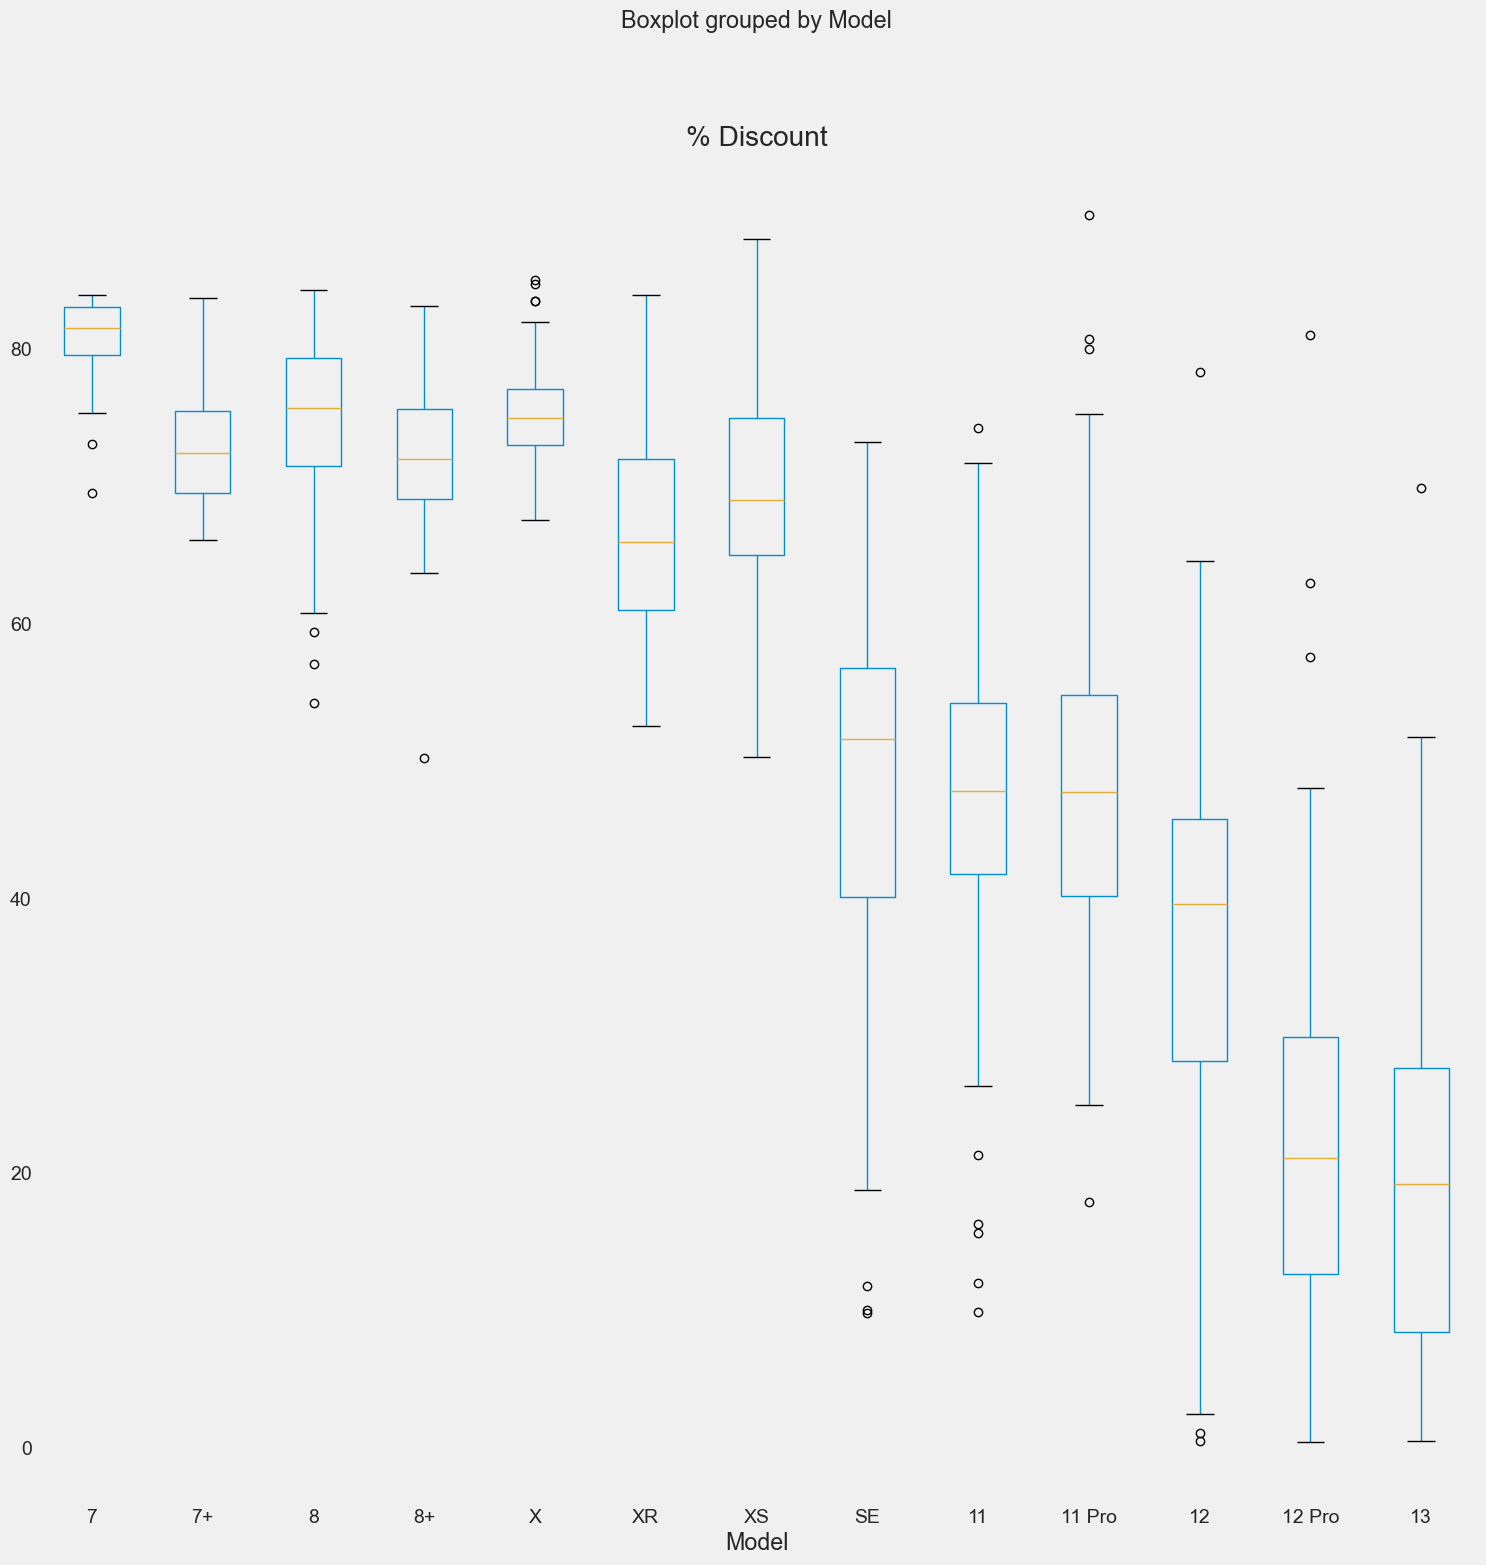

In [130]:
df_2022_plot_sorted.boxplot(by ='Model', column =['% Discount'], grid = False, figsize=(18,18))
plt.show()

In [131]:
df_2022_plot['Model'].value_counts()

11        103
XR         93
12         84
X          75
8          67
11 Pro     62
12 Pro     54
SE         50
XS         48
7          37
8+         33
7+         25
13         25
13 Pro     12
6S          6
6+          2
5           1
3GS         1
Name: Model, dtype: int64

In [132]:
iphone_11 = df_2022_plot[df_2022_plot['Model']=='11']['% Discount']
iphone_XR = df_2022_plot[df_2022_plot['Model']=='XR']['% Discount']
iphone_12 = df_2022_plot[df_2022_plot['Model']=='12']['% Discount']
iphone_X = df_2022_plot[df_2022_plot['Model']=='X']['% Discount']
iphone_8 = df_2022_plot[df_2022_plot['Model']=='8']['% Discount']
iphone_11Pro = df_2022_plot[df_2022_plot['Model']=='11 Pro']['% Discount']
iphone_12Pro = df_2022_plot[df_2022_plot['Model']=='12 Pro']['% Discount']
iphone_SE = df_2022_plot[df_2022_plot['Model']=='SE']['% Discount']
iphone_XS = df_2022_plot[df_2022_plot['Model']=='XS']['% Discount']
iphone_7 = df_2022_plot[df_2022_plot['Model']=='7']['% Discount']
iphone_13 = df_2022_plot[df_2022_plot['Model']=='13']['% Discount']
iphone_8plus = df_2022_plot[df_2022_plot['Model']=='8+']['% Discount']
iphone_7plus = df_2022_plot[df_2022_plot['Model']=='7+']['% Discount']

iphones = [iphone_11, iphone_XR, iphone_12,iphone_X,
          iphone_8, iphone_11Pro, iphone_12Pro, iphone_SE,
          iphone_XS, iphone_7, iphone_13, iphone_8plus, iphone_7plus]

fig = plt.figure()
# Create an axes instance
ax = fig.add_axes([0,0,1,1])
# Create the boxplot
#bp = ax.boxplot(iphones)
#plt.show()


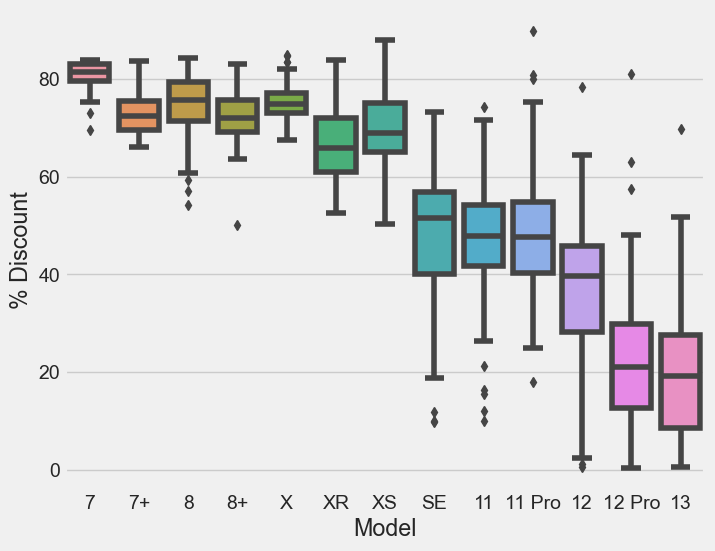

In [133]:
## seaboen
sns.set_style("ticks")
plt.style.use('fivethirtyeight')
sns.boxplot(x = 'Model', y = '% Discount',order = ['7','7+','8',
                                                  '8+','X','XR','XS','SE',
                                                  '11','11 Pro','12',
                                                  '12 Pro','13'], data = df_2022_plot)
plt.show()

<ipython-input-134-41a4811eb259>:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


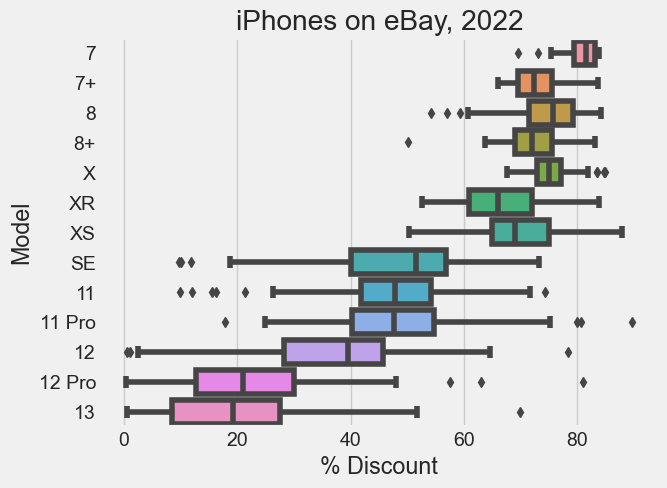

In [134]:
ax = sns.boxplot(x = '% Discount', y = 'Model',order = ['7','7+','8',
                                                  '8+','X','XR','XS','SE',
                                                  '11','11 Pro','12',
                                                  '12 Pro','13'], data = df_2022_plot)
#ax = sns.stripplot(x='% Discount', y = 'Model', data=df_2022_plot, color="blue", jitter=0.2, size=2.5)
title = ax.set_title("iPhones on eBay, 2022", loc="center")
fig.tight_layout()
title.set_y(1.05)
fig.subplots_adjust(top=0.8)
plt.savefig('iphone_boxplot.png')
plt.show()

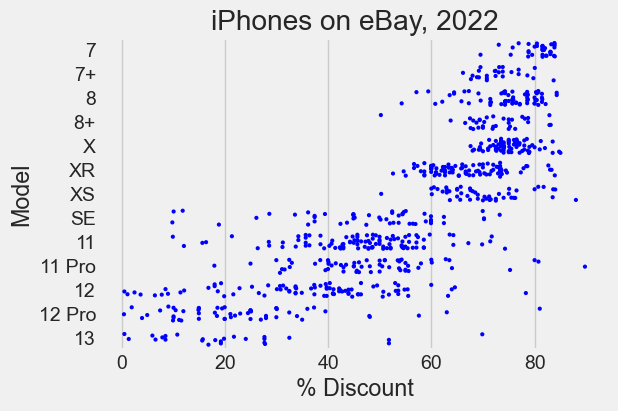

In [135]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax = sns.stripplot(x='% Discount', y = 'Model', order = ['7','7+','8',
                                                  '8+','X','XR','XS','SE',
                                                  '11','11 Pro','12',
                                                  '12 Pro','13'],data=df_2022_plot, color="blue", jitter=0.3, size=3)
title = ax.set_title("iPhones on eBay, 2022", loc="center")
fig.tight_layout()
title.set_y(1.05)
fig.subplots_adjust(top=0.8)
plt.savefig('iphone_jitter.png')
plt.show()

In [136]:
df_2022_plot['Date'].value_counts()

2022-01-01    263
2022-08-20     17
2022-02-17     12
2022-02-22     11
2022-02-16      9
             ... 
2022-06-22      1
2022-06-24      1
2022-06-25      1
2022-06-26      1
2022-06-07      1
Name: Date, Length: 155, dtype: int64

In [137]:
df_2022_excel['Model'].value_counts().to_frame()

,Model
11,110
XR,101
12,92
SE,80
8,79
X,76
11 Pro,67
7,66
12 Pro,63
XS,54


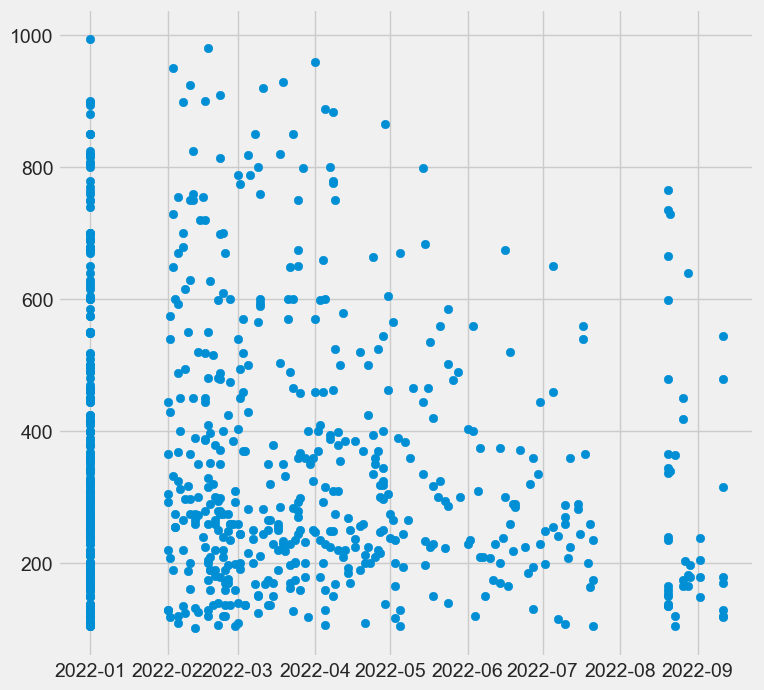

In [138]:
x = df_2022_plot['Date']
y = df_2022_plot['Price']
category = df_2022_plot['Model']

fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x, y)
plt.show()

In [139]:
df_2021_excel_format = df_2021_excel[df_2021_excel['Price']>100]
df_2021_excel_format['Price'] = pd.to_numeric(df_2021_excel_format['Price'])
df_2021_excel_format.head()

<ipython-input-139-2fdc4f5dec45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_excel_format['Price'] = pd.to_numeric(df_2021_excel_format['Price'])


,Product,Price,Date,Model
181,Apple iPhone 6 16GB 64GB 128GB Factory Unlocked AT&T Verizon TMobile Sprint Mint,100,04/08/2021,6
182,Apple iPhone 8 Plus - 64GB - Space Gray (Straight Talk) A1864 (CDMA + GSM),101,01/02/2021,8+
183,Apple iPhone 7 A1778 32GB 128GB 256GB AT&T Verizon T-Mobile or Unlocked (P),101,04/08/2021,7
184,Apple iPhone 7 32GB Black (Unlocked) Smartphone,101,04/08/2021,XR
185,Apple iPhone 6 - 64GB - Space Gray (Unlocked) A1649 (CDMA + GSM) (CA),102,01/08/2021,6


In [140]:
df_2021_format = df_2021_excel_format[['Model','Price']].groupby('Model').agg(['count','mean'])
df_2021_format.index


Index([       5,        6,        7,        8,       11,       12,       13,
       '11 Pro', '12 Pro', '13 Pro',     '2G',     '5S',     '6S',     '7+',
           '8+',      'R',     'SE',      'X',     'XR',     'XS'],
      dtype='object', name='Model')

In [141]:
df_2021_format = df_2021_format.loc[['13 Pro',13,'12 Pro',12,
                                    '11 Pro',11,'X','XR',
                                    'XS','SE','8+',8,
                                    '7+',7,'6S',6,
                                    '5S',5,'2G','R'],:]

In [142]:
#df_2021_format['Price'] = pd.to_numeric(df_2021_format['Price'])
df_2021_format.style.set_caption('iPhones on Ebay in 2021')
#df_2021_format.style.format("${:.2}")
df_2021_format.columns

MultiIndex([('Price', 'count'),
            ('Price',  'mean')],
           )

In [143]:
df_2021_format_ = df_2021_format.copy()
df_2021_format_.columns.set_levels(['Total #', 'avg, in $'],level=1,inplace=True)
#df_2021_format_.style.set_caption('iPhones on Ebay in 2021')
df_2021_format_.head(12)


<ipython-input-143-dea73518b5a8>:2: FutureWarning: inplace is deprecated and will be removed in a future version.
  df_2021_format_.columns.set_levels(['Total #', 'avg, in $'],level=1,inplace=True)


Price          
       Total # avg, in $
Model                   
13 Pro       3       765
13          42     1,149
12 Pro      73       840
12         162       659
11 Pro      45       544
11         126       444
X          130       335
XR         118       302
XS         113       369
SE          70       243
8+          54       276
8          131       236

In [144]:

df_2022_excel = pd.read_excel('iPhone_2022_all_edit.xlsx')
df_2022_excel = df_2022_excel[['Product','Price','Date','Model']]
df_2022_plot = df_2022_excel[df_2022_excel['Price']>100]
df_2022_plot.sort_values(by=['Price'],ascending=False)
df_2022_plot['Date'] = pd.to_datetime(df_2022_plot['Date'])
df_2022_plot.head()

<ipython-input-144-55aef98ee13d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_plot['Date'] = pd.to_datetime(df_2022_plot['Date'])


,Product,Price,Date,Model
0,Apple iPhone 8 64GB GSM Factory Unlocked GRAY & SILVER (GOOD CONDITION),180,2022-01-01,8
1,Apple iPhone 8 64GB 256GB Unlocked Straight talk T-mobile AT&T Verizon Metro (N),239,2022-01-01,8
2,Apple iPhone 11 Pro - 256GB - All Colors (Unlocked) A2160 - Good Condition,549,2022-01-01,11 Pro
3,Apple iPhone XR Black 128GB A1984 LTE GSM CDMA Verizon Unlocked - Very Good,337,2022-01-01,XR
4,Apple iPhone XR 64GB Factory Unlocked Smartphone 4G LTE iOS Smartphone - Very,310,2022-01-01,XR


In [145]:
df_2022_excel_format = df_2022_excel[df_2022_excel['Price']>100]
df_2022_excel_format['Price'] = pd.to_numeric(df_2022_excel_format['Price'])
df_2022_excel_format.head()

<ipython-input-145-4162980f4f5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022_excel_format['Price'] = pd.to_numeric(df_2022_excel_format['Price'])


,Product,Price,Date,Model
0,Apple iPhone 8 64GB GSM Factory Unlocked GRAY & SILVER (GOOD CONDITION),180,01/01/2022,8
1,Apple iPhone 8 64GB 256GB Unlocked Straight talk T-mobile AT&T Verizon Metro (N),239,01/01/2022,8
2,Apple iPhone 11 Pro - 256GB - All Colors (Unlocked) A2160 - Good Condition,549,01/01/2022,11 Pro
3,Apple iPhone XR Black 128GB A1984 LTE GSM CDMA Verizon Unlocked - Very Good,337,01/01/2022,XR
4,Apple iPhone XR 64GB Factory Unlocked Smartphone 4G LTE iOS Smartphone - Very,310,01/01/2022,XR


In [146]:

df_2022_format = df_2022_excel_format[['Model','Price']].groupby('Model').agg(['count','mean'])
df_2022_format.index


df_2022_format = df_2022_format.loc[['13 Pro',13,'12 Pro',12,
                                    '11 Pro',11,'X','XR',
                                    'XS','SE','8+',8,
                                    '7+',7,'6S',
                                    5],:]

In [147]:
df_2022_format_ = df_2022_format.copy()
df_2022_format_.columns.set_levels(['Total #', 'avg, in $'],level=1,inplace=True)
#df_2022_format_.style.set_caption('iPhones on Ebay in 2022')
df_2022_format_.head(12)


<ipython-input-147-4a8d5a7c21c4>:2: FutureWarning: inplace is deprecated and will be removed in a future version.
  df_2022_format_.columns.set_levels(['Total #', 'avg, in $'],level=1,inplace=True)


Price          
       Total # avg, in $
Model                   
13 Pro      24       960
13          33       726
12 Pro      59       794
12          85       532
11 Pro      62       515
11         104       376
X           75       248
XR          93       250
XS          48       300
SE          52       220
8+          33       222
8           67       179